In [8]:

# Import necessary libraries
import numpy as np         # For numerical operations
import pandas as pd        # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns      # For statistical data visualization
from sklearn.linear_model import LinearRegression    # For linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting data and evaluating model performance
from sklearn.preprocessing import StandardScaler # For scaling features
from sklearn.linear_model import Ridge # For regression with regularization
from sklearn.impute import SimpleImputer # For handling missing values
import matplotlib.pyplot as plt # For creating plots and visualizations
import seaborn as sns # focus on statistical graphics.

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [10]:
# Step 2: Load and prepare the data
# Load datasets
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Feature selection - Use 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd'
features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd']  # Updated features
target = 'SalePrice'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]


In [11]:
# Step 3: Handle missing values
# Create an imputer object to replace missing values with the median
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [12]:
# Step 4: Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Step 5: Create interaction features (if necessary)
# Adding interaction term between 'GrLivArea' and 'TotalBsmtSF'
X_train_scaled = np.hstack([X_train_scaled, (X_train_scaled[:, 0] * X_train_scaled[:, 1]).reshape(-1, 1)])
X_test_scaled = np.hstack([X_test_scaled, (X_test_scaled[:, 0] * X_test_scaled[:, 1]).reshape(-1, 1)])

# Adding interaction terms between other features if needed
# For example, interaction between 'BedroomAbvGr' and 'FullBath'
X_train_scaled = np.hstack([X_train_scaled, (X_train_scaled[:, 3] * X_train_scaled[:, 4]).reshape(-1, 1)])
X_test_scaled = np.hstack([X_test_scaled, (X_test_scaled[:, 3] * X_test_scaled[:, 4]).reshape(-1, 1)])


In [15]:
# Step 6: Apply Linear Regression
linear_model = LinearRegression()  # Basic linear regression model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:

# Step 7: Evaluate the model
# Make predictions
predictions = linear_model.predict(X_test_scaled)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': predictions
})
submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Predictions made and submission file saved in /kaggle/working/submission.csv.")
print("The predicted values:")
print(predictions)

# Evaluate the model on training data for demonstration
train_predictions = linear_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Cross-validation score for additional validation
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')


Predictions made and submission file saved in /kaggle/working/submission.csv.
The predicted values:
[147621.19589041 158629.19589041 189061.19589041 ... 146293.19589041
  80101.19589041 241637.19589041]
Mean Squared Error: 1787099335.3287435
R-squared: 0.7166387756392876
Cross-validated MSE: 2192352184.9829574


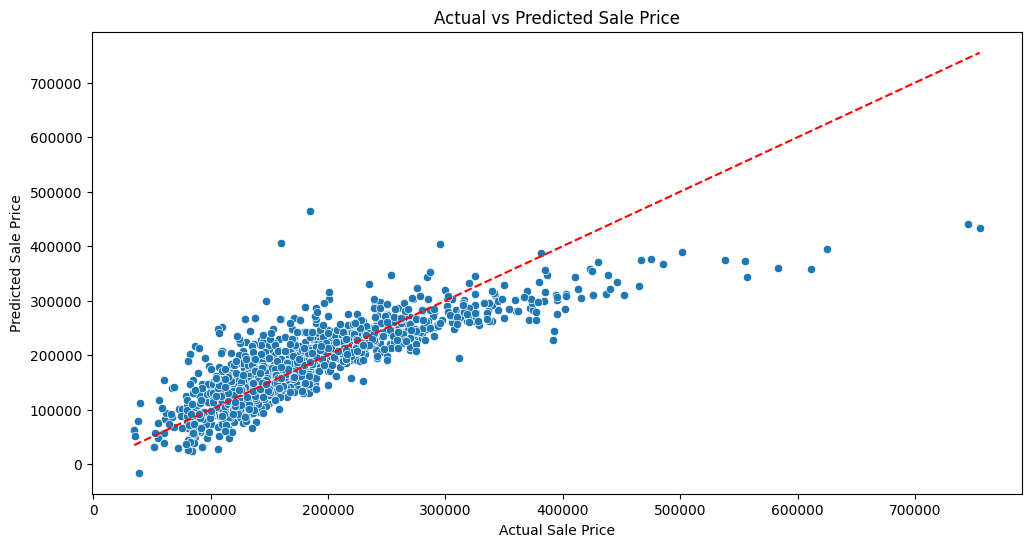

In [5]:
# Visualizations

# 1. Predicted vs Actual Values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_train, y=train_predictions)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.show()


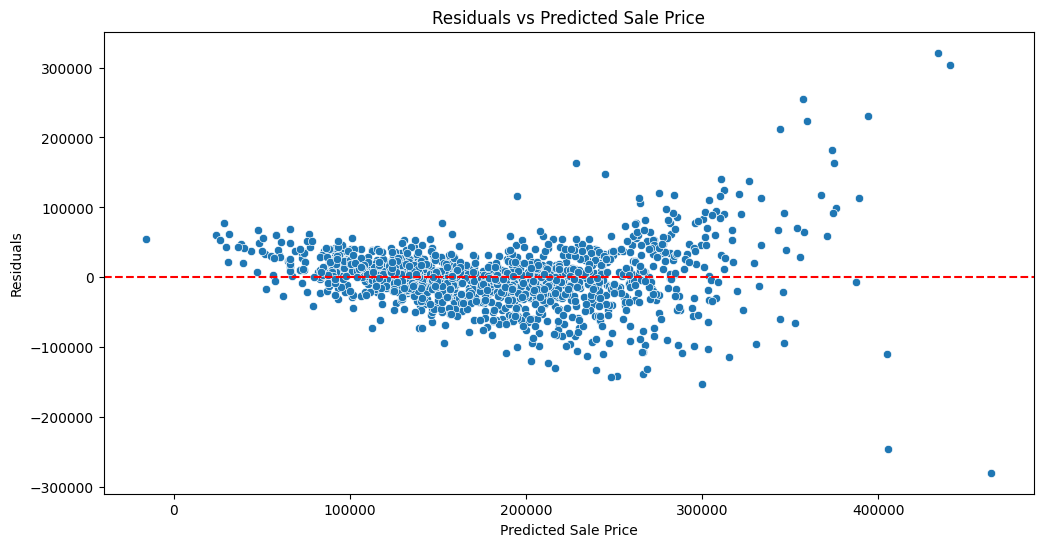

In [6]:
# 2. Residuals Plot
residuals = y_train - train_predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_predictions, y=residuals)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')
plt.axhline(0, color='r', linestyle='--')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


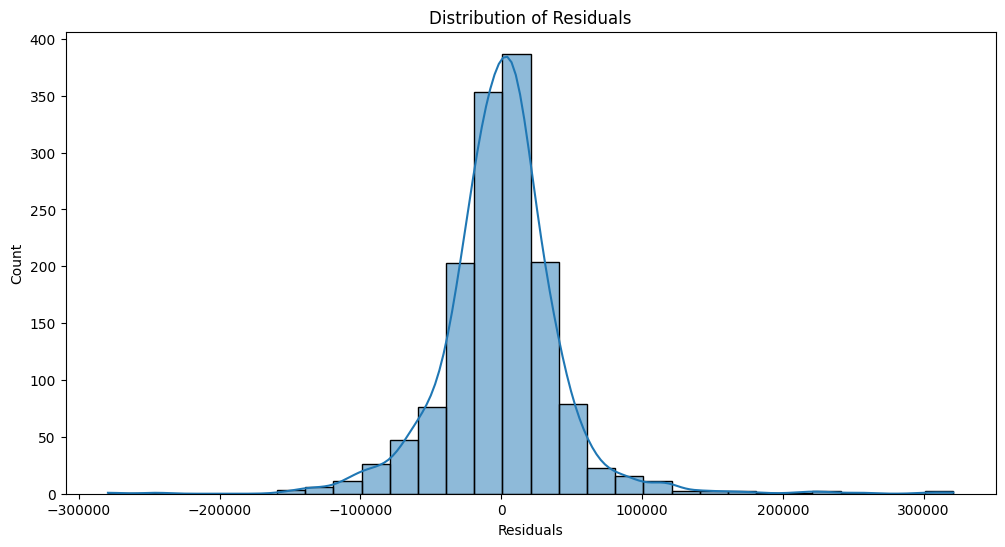

In [7]:
# 3. Distribution of Errors
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()